In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100

In [2]:
file_path = Path("./data/raw/recipes_filtered.csv")
df = pd.read_csv(file_path)

In [4]:
df['Health']=''
keyword_categories = pd.read_csv(Path("./data/raw/keywords.csv"))
for health in tqdm(keyword_categories['Health'].dropna().str.lower()):
    for j in range(0,len(df)):
        try:
            if df.loc[j,'Keywords'].lower().find(health)!=-1:
                df.loc[j,'Health']=health
        except:
            continue


  0%|          | 0/19 [00:00<?, ?it/s]

In [5]:
df_combined_health=df[['AggregatedRating', 'Health']]
df_combined_health.drop(index=df_combined_health[df_combined_health['Health']=='nan'].index,inplace=True)
df_combined_health.drop(index=df_combined_health[df_combined_health['Health']=='high in...'].index,inplace=True)
df_combined_health.loc[df_combined_health['Health']=='', 'Health']='No dietary restrictions'
df_combined_health.dropna(inplace=True)
df_combined_health



,AggregatedRating,Health
0,3.0,No dietary restrictions
1,4.5,healthy
2,4.5,vegetable
3,4.5,vegan
4,5.0,No dietary restrictions
...,...,...
123608,5.0,No dietary restrictions
123609,5.0,No dietary restrictions
123610,5.0,No dietary restrictions
123611,5.0,healthy


In [6]:
health_count=df_combined_health['Health'].value_counts()<100
for health in health_count.index:
    if health_count[health]:
        df_combined_health.drop(df_combined_health[df_combined_health['Health']==health].index,inplace=True)
df_combined_health['Health'].value_counts()

Health
No dietary restrictions    58051
vegetable                  24122
healthy                    15204
kid friendly                6200
low protein                 4019
very low carbs              3538
vegan                       3486
toddler friendly            1776
high protein                1625
low cholesterol             1396
egg free                    1106
kosher                      1036
lactose free                 354
Name: count, dtype: int64

In [7]:
Health_ranking=pd.DataFrame(df_combined_health.groupby('Health').mean()['AggregatedRating'].sort_values(ascending=False))
Health_ranking

,AggregatedRating
Health,
low protein,4.804056
low cholesterol,4.776146
very low carbs,4.766111
high protein,4.760923
kid friendly,4.748065
vegetable,4.744403
No dietary restrictions,4.739367
toddler friendly,4.735079
vegan,4.727194


In [8]:
# df_combined_country['Country'].value_counts()
from numpy import random
import matplotlib.pyplot as plt
boxes=[]
labels=[]
for health in Health_ranking.index:
    boxes.append(df_combined_health[df_combined_health['Health']==health]['AggregatedRating'])
    labels.append(health)

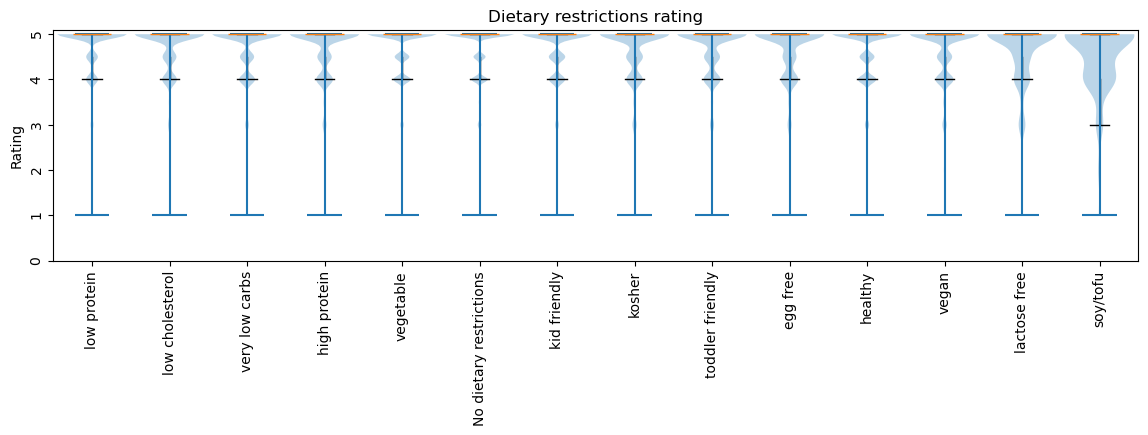

In [55]:
import seaborn as sns
plt.figure(figsize=(14,3))
plt.boxplot(boxes,labels=labels, showbox=False, flierprops={'marker': 'o', 'markersize': 0, 'markeredgecolor': 'red'} )
plt.violinplot(boxes, widths=.9)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel('Rating')
plt.title('Dietary restrictions rating')
plt.ylim(0,5.1)
plt.show()

In [5]:
# Country_ranking.to_csv('Country_ranking.csv')